<H1>Stratégie Envelope Multicoin</H1>
Indicateurs: Envelope + SMA<br>
SEG

In [1]:
# Modules standards
import sys
sys.path.append('../..')
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import nest_asyncio
nest_asyncio.apply()

# ========== CHOIX DE LA VERSION DU MOTEUR ==========
# v1 = ancien système (BUG avec leverage - à garder pour comparaison legacy)
# v2 = nouveau système avec marge et liquidation correctes
ENGINE_VERSION = "v2"  # "v1" ou "v2"
# ===================================================

# Modules perso - Import conditionnel selon la version
if ENGINE_VERSION == "v2":
    from utilities.strategies.envelopeMulti_v2 import EnvelopeMulti_v2 as EnvelopeMulti
    print("ENGINE V2 - Systeme de marge et liquidation corriges")
else:
    from utilities.strategies.envelopeMulti import EnvelopeMulti
    print("ENGINE V1 (LEGACY) - Ancien systeme avec bug leverage")

from utilities.data_manager import ExchangeDataManager
from utilities.bt_analysis import multi_backtest_analysis
from utilities.plot_analysis import plot_equity_vs_asset, plot_bar_by_month

ENGINE V2 - Systeme de marge et liquidation corriges


c:\Users\jacks\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Liste des coins à backtester avec la stratégie.
# Chaque coin peut avoir un paramètre et un poids différent
ma_base_window_std = 7
envelope_std = [0.07, 0.1, 0.15, 0.2]   # 7%, 10%, 15%, 20%
size_std = 0.06                         # Taille du lot (0.06 = 6%)

# ============================================================
# CONFIGURATION CENTRALE (alignée avec le robot live)
# ============================================================
BACKTEST_LEVERAGE = 10  # Leverage utilisé (doit correspondre au live)

# NOTE IMPORTANTE:
# Le backtest utilise TOUJOURS reinvest=True en mode "scaling" pour reproduire 
# le comportement du live (recalcul du sizing à chaque trade).
# Les size ci-dessous sont les valeurs du LIVE et seront automatiquement 
# divisés par le leverage pour le backtest.

params_live = {
    "BTC/USDT:USDT":{ "src": "close", "ma_base_window": 7, "envelopes": [0.07, 0.1, 0.15], "size": 0.1,},
    "ETH/USDT:USDT":{ "src": "close", "ma_base_window": 7, "envelopes": [0.07, 0.1, 0.12], "size": 0.1,},
    "BNB/USDT:USDT":{ "src": "close", "ma_base_window": 8, "envelopes": [0.07, 0.1, 0.12], "size": 0.1,},
    "SOL/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": [0.07, 0.1, 0.12], "size": size_std,},
    "ADA/USDT:USDT":{ "src": "close", "ma_base_window": 8, "envelopes": [0.07, 0.1, 0.14, 0.18], "size": 0.1,},
    "AR/USDT:USDT":{ "src": "close", "ma_base_window": 6, "envelopes": [0.05, 0.08, 0.1, 0.12], "size": size_std,},
    "AVAX/USDT:USDT":{ "src": "close", "ma_base_window": 6, "envelopes": [0.08, 0.1, 0.15, 0.2], "size": 0.1,},
    "EGLD/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "KSM/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "ACH/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "APE/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "CRV/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "DOGE/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "DYDX/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "ENJ/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "FET/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "GALA/USDT:USDT":{ "src": "close", "ma_base_window": 5, "envelopes": envelope_std, "size": size_std,},
    "ICP/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "IMX/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "LDO/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "MAGIC/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "NEAR/USDT:USDT":{ "src": "close", "ma_base_window": 5, "envelopes": envelope_std, "size": size_std,},
    "SAND/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "SUSHI/USDT:USDT":{ "src": "close", "ma_base_window": 8, "envelopes": envelope_std, "size": size_std,},
    "THETA/USDT:USDT":{ "src": "close", "ma_base_window": 5, "envelopes": envelope_std, "size": size_std,},
    "TRX/USDT:USDT": {"src": "close", "ma_base_window": 8, "envelopes": [0.08, 0.12, 0.15], "size": 0.05,},
    "UNI/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
    "XTZ/USDT:USDT":{ "src": "close", "ma_base_window": ma_base_window_std, "envelopes": envelope_std, "size": size_std,},
}

# Ajustement automatique des size pour le backtest (division par leverage)
# Pourquoi ? Le moteur V2 en mode "scaling" calcule: notional = equity * size * leverage
# Pour coller au live qui fait: notional = balance * size * leverage
# On doit diviser size par leverage: notional = equity * (size/leverage) * leverage = equity * size
params = {}
for pair, p in params_live.items():
    params[pair] = p.copy()
    params[pair]["size"] = p["size"] / BACKTEST_LEVERAGE

print(f"⚙️  CONFIGURATION BACKTEST (alignée avec live):")
print(f"   Leverage: {BACKTEST_LEVERAGE}x")
print(f"   Reinvest: OUI (recalcul sizing à chaque trade)")
print(f"   Size ajusté: divisé par {BACKTEST_LEVERAGE} pour cohérence")
print(f"   Exemple: BTC size_live={params_live['BTC/USDT:USDT']['size']:.2f} → size_backtest={params['BTC/USDT:USDT']['size']:.4f}")

pair_list = list(params.keys())
exchange_name = "binance"
tf = '1h'
oldest_pair = "BTC/USDT:USDT"

exchange = ExchangeDataManager(exchange_name=exchange_name, path_download="../database/exchanges")

df_list = {}
for pair in pair_list:
    df = exchange.load_data(pair, tf)
    df_list[pair] = df.loc["2020-04-01": ]

print(f"✅ Data chargée: {len(pair_list)} paires depuis 2020-04-01")

⚙️  CONFIGURATION BACKTEST (alignée avec live):
   Leverage: 10x
   Reinvest: OUI (recalcul sizing à chaque trade)
   Size ajusté: divisé par 10 pour cohérence
   Exemple: BTC size_live=0.10 → size_backtest=0.0100
✅ Data chargée: 28 paires depuis 2020-04-01


<H2>Backtest</H2>

In [ ]:
# ============================================================
# PARAMETRES BACKTEST (synchronisés avec cellule 2)
# ============================================================
initial_wallet = 1000
leverage = BACKTEST_LEVERAGE  # Synchronisé avec cellule 2
reinvest = True               # TOUJOURS True pour reproduire le live
stop_loss = 0.25              # 25% (1 = 100%)
liquidation = True            # Liquidation activée
type = ["long", ""]           # Long uniquement (pas de short)
maker_fee, taker_fee = 0.0002, 0.0006  # Bitget

# === PARAMETRES V2 ===
gross_cap = 5         # Cap exposition brute (5x equity)
per_side_cap = 4      # Cap par côté LONG/SHORT (4x equity)
per_pair_cap = 1.2    # Cap par paire (1.2x equity pour DCA)
margin_cap = 0.9      # Cap marge utilisée (0.9x equity)
use_kill_switch = False

# RISK MODE (V2 uniquement)
risk_mode = "scaling"  # TOUJOURS "scaling" pour coller au live
max_expo_cap = 2.5     # (HYBRID only)

# Autres paramètres V2
auto_adjust_size = False  # Déjà fait dans cellule 2
extreme_leverage_threshold = 50

# Slippage (optionnel)
entry_slippage_bps = 5   # 0.05%
exit_slippage_bps  = 5   # 0.05%
# ============================================================

print(f"Configuration Backtest:")
print(f"  Version moteur: {ENGINE_VERSION}")
print(f"  Wallet initial: {initial_wallet}$")
print(f"  Leverage: {leverage}x")
print(f"  Stop-loss: {stop_loss*100}%")
print(f"  Reinvest: ✅ OUI (comme live)")
print(f"  Type: {type}")

if ENGINE_VERSION == "v2":
    print(f"\nParametres V2:")
    print(f"  Risk mode: {risk_mode.upper()}")
    print(f"  ✅ Size ajusté pour reinvest=True (divisé par {leverage})")
    print(f"  Gross cap: {gross_cap}x | Per-side: {per_side_cap}x | Per-pair: {per_pair_cap}x")
    print(f"  Margin cap: {margin_cap}x | Kill-switch: {'ON' if use_kill_switch else 'OFF'}")

strat = EnvelopeMulti(df_list=df_list, oldest_pair=oldest_pair, type=type, params=params)

strat.populate_indicators()
strat.populate_buy_sell()

# # === DEBUG: Vérifier génération des signaux ===
# print("\n" + "="*60)
# print("DEBUG: ANALYSE DES SIGNAUX GENERES")
# print("="*60)
# for pair in list(params.keys())[:8]:  # 8 premières paires
#     df = strat.df_list[pair]
#     try:
#         signals_2020 = df.loc["2020"].get('open_long_1', pd.Series([False]*len(df.loc["2020"]))).sum()
#         signals_2021_plus = df.loc["2021":].get('open_long_1', pd.Series([False]*len(df.loc["2021":]))).sum()
#         total_signals = df.get('open_long_1', pd.Series([False]*len(df))).sum()
#         print(f"{pair:20s} | 2020: {signals_2020:4d} | 2021+: {signals_2021_plus:4d} | Total: {total_signals:4d}")
#     except Exception as e:
#         print(f"{pair:20s} | ERREUR: {e}")

# Appel du backtest
if ENGINE_VERSION == "v2":
    bt_result = strat.run_backtest(
        initial_wallet=initial_wallet, leverage=leverage, maker_fee=maker_fee,
        taker_fee=taker_fee, stop_loss=stop_loss, reinvest=reinvest, liquidation=liquidation,
        gross_cap=gross_cap, per_side_cap=per_side_cap, per_pair_cap=per_pair_cap, 
        margin_cap=margin_cap, use_kill_switch=use_kill_switch,
        auto_adjust_size=auto_adjust_size, extreme_leverage_threshold=extreme_leverage_threshold,
        risk_mode=risk_mode, max_expo_cap=max_expo_cap
    )
else:
    bt_result = strat.run_backtest(initial_wallet=initial_wallet, leverage=leverage, maker_fee=maker_fee,
        taker_fee=taker_fee, stop_loss=stop_loss, reinvest=reinvest, liquidation=liquidation
    )

print(f"\n{'='*60}")
print(f"RESULTATS BACKTEST ({ENGINE_VERSION.upper()})")
print(f"{'='*60}")

# === DEBUG: Afficher les event counters ===
if 'event_counters' in bt_result:
    print("\n" + "="*60)
    print("DEBUG: EVENT COUNTERS (rejections et statistiques)")
    print("="*60)
    for key, value in bt_result['event_counters'].items():
        if value > 0:  # Afficher seulement les non-nuls
            if isinstance(value, float):
                print(f"  {key:35s}: {value:12.2f}")
            else:
                print(f"  {key:35s}: {value:6d}")
    print("="*60 + "\n")

# Sections a afficher
df_trades, df_days = multi_backtest_analysis(
    trades=bt_result['trades'],
    days=bt_result['days'],
    leverage=leverage,
    general_info=True, trades_info=True, days_info=True, long_short_info=True,
    entry_exit_info=True, exposition_info=False, pair_info=True, indepedant_trade=True
)

Configuration Backtest:
  Version moteur: v2
  Wallet initial: 1000$
  Leverage: 10x
  Stop-loss: 25.0%
  Reinvest: ✅ OUI (comme live)
  Type: ['long', '']

Parametres V2:
  Risk mode: SCALING
  ✅ Size ajusté pour reinvest=True (divisé par 10)
  Gross cap: 5x | Per-side: 4x | Per-pair: 1.2x
  Margin cap: 0.9x | Kill-switch: OFF

DEBUG: ANALYSE DES SIGNAUX GENERES
BTC/USDT:USDT        | 2020:   12 | 2021+:   84 | Total:   96
ETH/USDT:USDT        | 2020:   32 | 2021+:  223 | Total:  255
BNB/USDT:USDT        | 2020:   45 | 2021+:  268 | Total:  313
SOL/USDT:USDT        | 2020:   61 | 2021+:  510 | Total:  571
ADA/USDT:USDT        | 2020:   74 | 2021+:  410 | Total:  484
AR/USDT:USDT         | ERREUR: '2020'
AVAX/USDT:USDT       | 2020:   15 | 2021+:  303 | Total:  318
EGLD/USDT:USDT       | 2020:   53 | 2021+:  426 | Total:  479

RESULTATS BACKTEST (V2)

DEBUG: EVENT COUNTERS (rejections et statistiques)
  added_margin                       :    102560.17
  released_margin                

## Comparaison V1 vs V2

**Differences cles** :
- **V1 (Legacy)** : Bug avec leverage - multiplie le PnL par leverage sans verifier la liquidation intra-bougie
- **V2 (Corrige)** : 
  - Systeme de marge correct (`init_margin = notional / leverage`)
  - Liquidation prix calcule et verifie intra-bougie (`low <= liq_price`)
  - Exposure caps pour limiter le risque
  - Kill-switch pour pause automatique apres drawdown

**Pour comparer** : Changez `ENGINE_VERSION` dans la premiere cellule et relancez le backtest.

In [4]:
# === Analyse specifique V2 : Liquidations ===
if ENGINE_VERSION == "v2" and len(df_trades) > 0:
    liquidation_trades = df_trades[df_trades['close_reason'] == 'Liquidation']
    
    if len(liquidation_trades) > 0:
        print(f"\nLIQUIDATIONS DETECTEES : {len(liquidation_trades)} trades liquides")
        print(f"{'='*80}")
        
        for idx, trade in liquidation_trades.iterrows():
            entry_price = trade['open_price']
            liq_price = trade['close_price']
            drop_pct = ((liq_price / entry_price) - 1) * 100
            
            print(f"\n{trade['pair']} - {trade['position']}")
            print(f"   Date: {trade['close_date']}")
            print(f"   Entry: {entry_price:,.2f}$")
            print(f"   Liquidation: {liq_price:,.2f}$")
            print(f"   Drop: {drop_pct:.2f}%")
            print(f"   Wallet apres: {trade['wallet']:.2f}$")
        
        print(f"\n{'='*80}\n")
    else:
        print("\nAucune liquidation detectee avec la configuration actuelle\n")
else:
    print(f"\nMode V1 : Pas d'analyse de liquidation intra-bougie\n")


LIQUIDATIONS DETECTEES : 885 trades liquides

THETA/USDT:USDT - LONG
   Date: 2020-05-27 15:00:00
   Entry: 0.41$
   Liquidation: 0.37$
   Drop: -9.00%
   Wallet apres: 1058.06$

THETA/USDT:USDT - LONG
   Date: 2020-05-27 17:00:00
   Entry: 0.38$
   Liquidation: 0.35$
   Drop: -9.00%
   Wallet apres: 1045.24$

THETA/USDT:USDT - LONG
   Date: 2020-05-27 20:00:00
   Entry: 0.37$
   Liquidation: 0.34$
   Drop: -9.00%
   Wallet apres: 1031.82$

THETA/USDT:USDT - LONG
   Date: 2020-05-27 22:00:00
   Entry: 0.33$
   Liquidation: 0.30$
   Drop: -9.00%
   Wallet apres: 1018.39$

DOGE/USDT:USDT - LONG
   Date: 2020-07-13 19:00:00
   Entry: 0.00$
   Liquidation: 0.00$
   Drop: -9.00%
   Wallet apres: 1334.14$

CRV/USDT:USDT - LONG
   Date: 2020-09-02 11:00:00
   Entry: 4.34$
   Liquidation: 3.95$
   Drop: -9.00%
   Wallet apres: 1911.10$

CRV/USDT:USDT - LONG
   Date: 2020-09-03 12:00:00
   Entry: 3.54$
   Liquidation: 3.22$
   Drop: -9.00%
   Wallet apres: 2013.10$

BNB/USDT:USDT - LONG
   Dat

In [4]:
# Analyse détaillée pour debug
# df_trades = df_trades.sort_index()
# SL_trades = df_trades[df_trades["close_reason"] == "Stop Loss"]
# result_columns = ["pair", "open_date", "close_date", "open_reason", "close_reason", "wallet", "trade_result", "drawdown", "drawdown_pct"]
# SL_trades.loc[:]

# df_trades.tail(20)

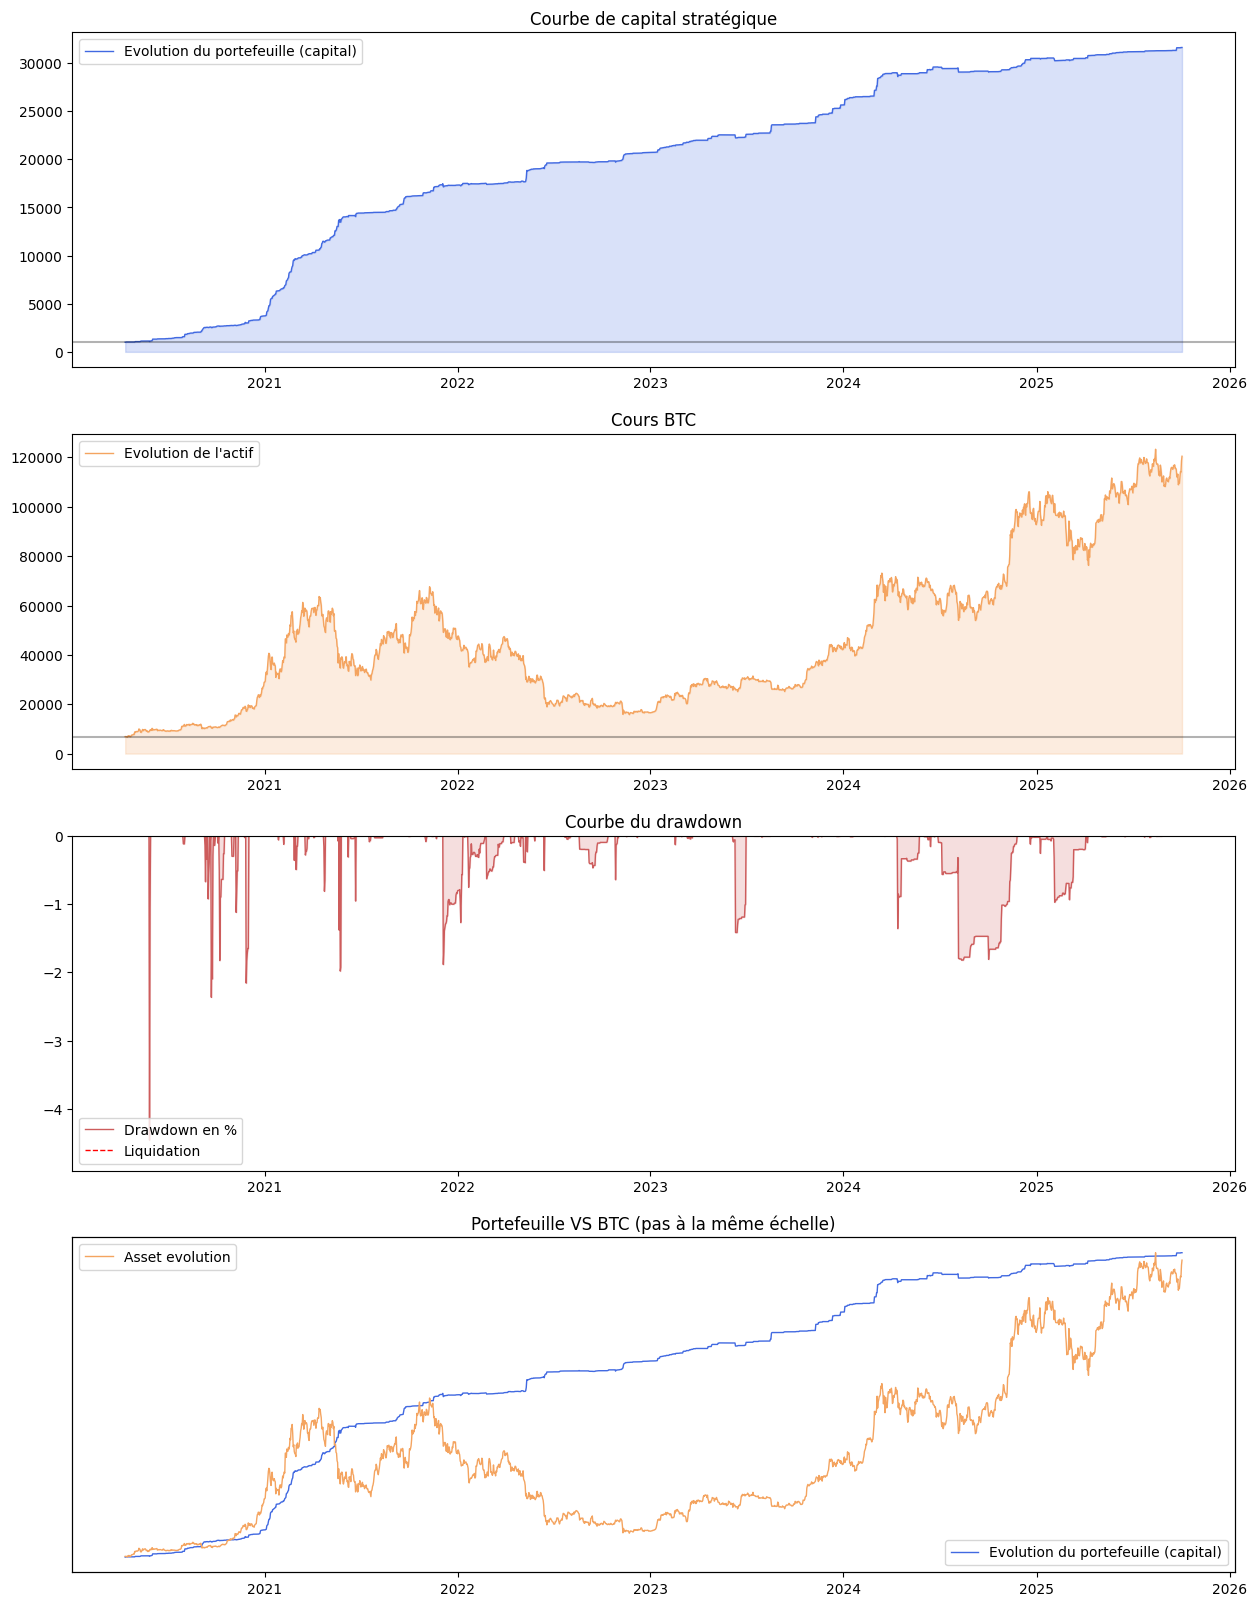

In [5]:
# plot_equity_vs_asset(df_days=df_days.loc["2020-03-11":"2020-03-20"], pair=oldest_pair)    # Pour analyse
plot_equity_vs_asset(df_days=df_days.loc[:], pair=oldest_pair, leverage=leverage, log=False) 

Trades dans le temps

In [6]:
# Trades au fil du temps
import plotly.graph_objects as go
import pandas as pd

df_trades['open_date'] = pd.to_datetime(df_trades['open_date'])
df_trades['close_date'] = pd.to_datetime(df_trades['close_date'])

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_trades['open_date'], y=df_trades['trade_result_pct']*100, mode='markers', marker=dict(color='green'), name='Open Trades'))
fig.add_trace(go.Scatter(x=df_trades['close_date'], y=df_trades['trade_result_pct']*100, mode='markers', marker=dict(color='red'), name='Close Trades'))

# Ajouter une deuxième échelle y pour la courbe du BTC
fig.add_trace(go.Scatter(x=df_days['day'], y=df_days['price'], mode='lines', line=dict(color='rgba(0, 0, 255, 0.2)'), name='Prix du Bitcoin', yaxis='y2'))

fig.update_layout(title='Résultats des trades au fil du temps', xaxis_title='Date', showlegend=True,
                  yaxis=dict(title='Résultat des Trades [%]'),
                  yaxis2=dict(title='Prix du Bitcoin', overlaying='y', side='right'))

fig.show()

<H3>Performance par mois et année</H3>

----- 2020 Cumulative Performances: 273.25% -----


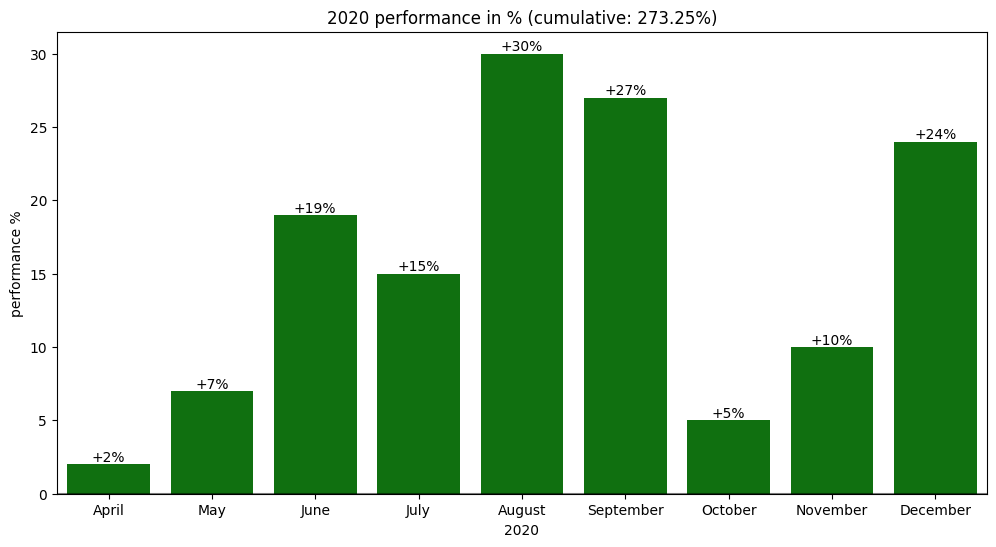

----- 2021 Cumulative Performances: 363.41% -----


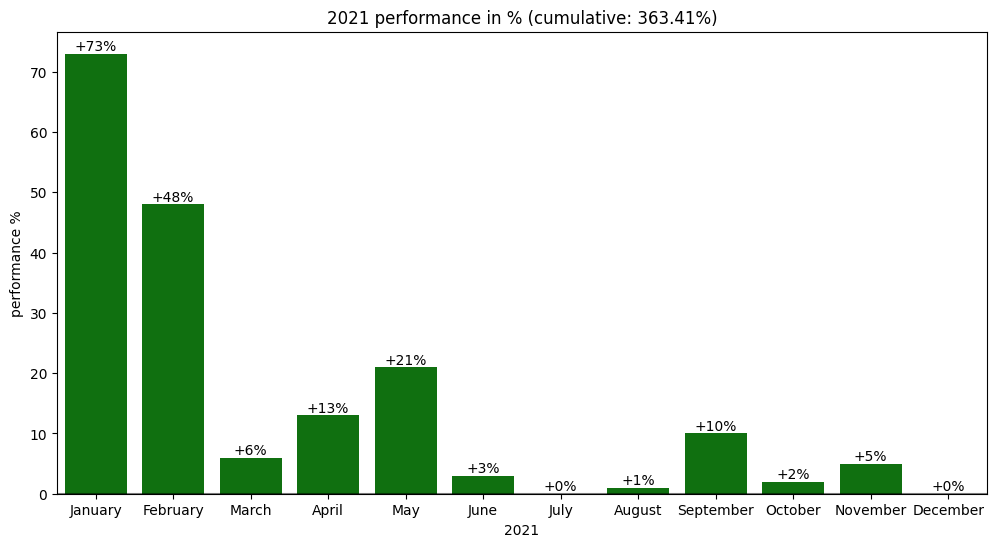

----- 2022 Cumulative Performances: 19.61% -----


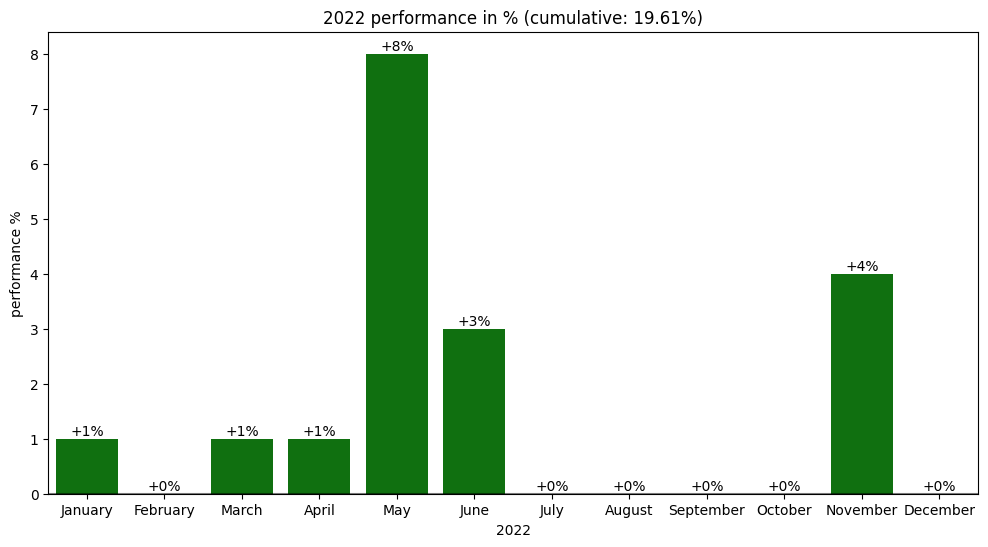

----- 2023 Cumulative Performances: 23.75% -----


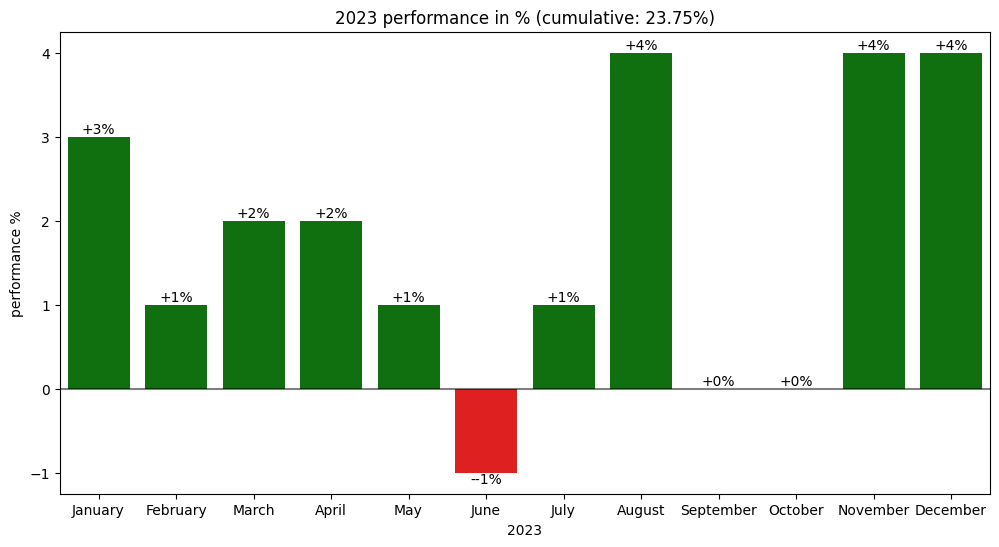

----- 2024 Cumulative Performances: 18.85% -----


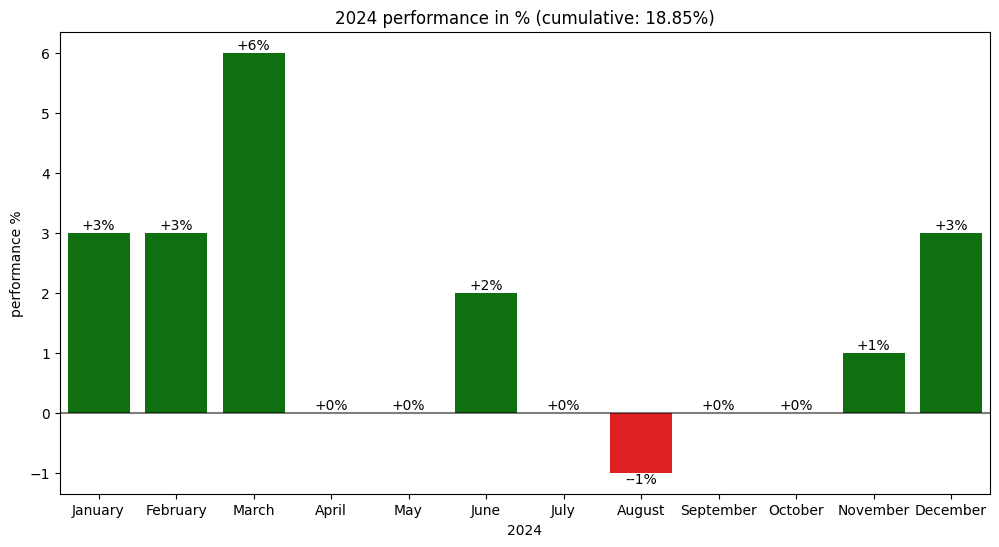

----- 2025 Cumulative Performances: 3.71% -----


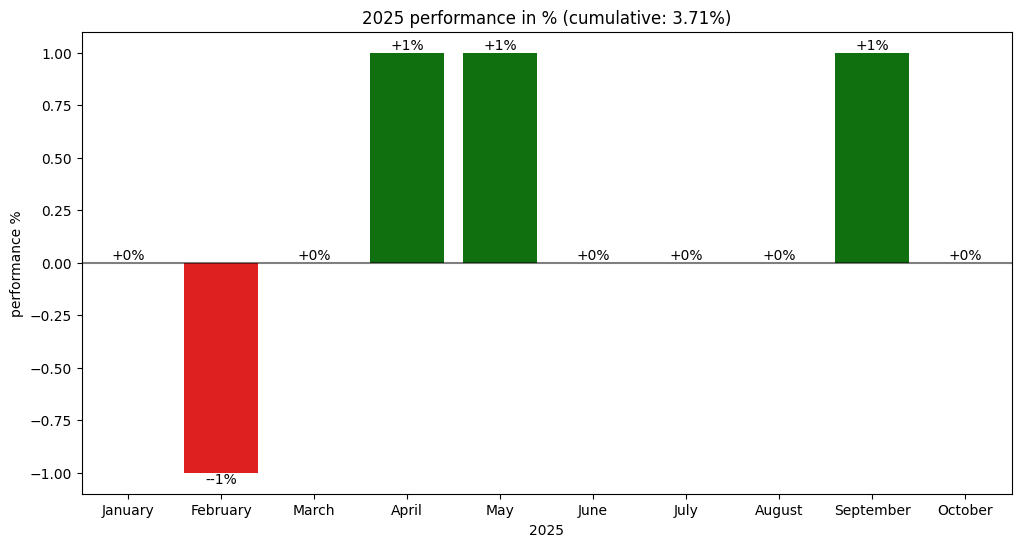

In [7]:
plot_bar_by_month(df_days=df_days)

<H2>Courbe de surapprentissage</H2>

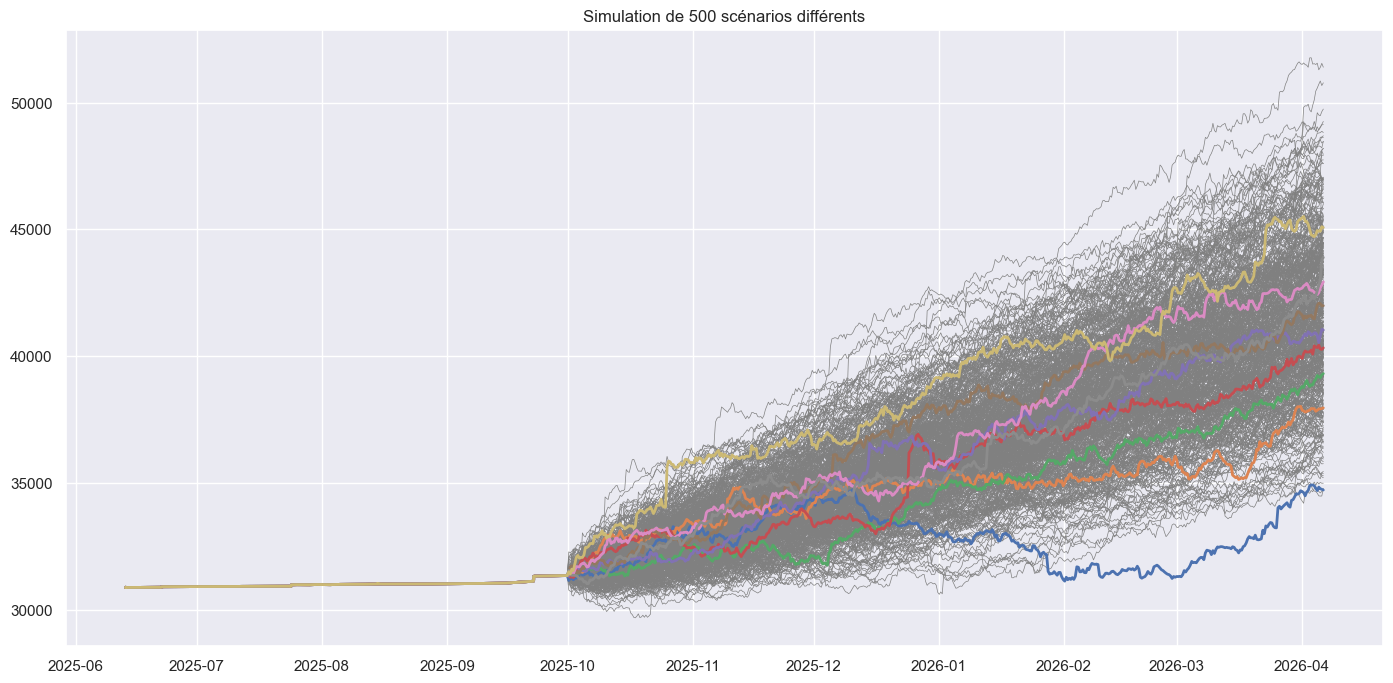

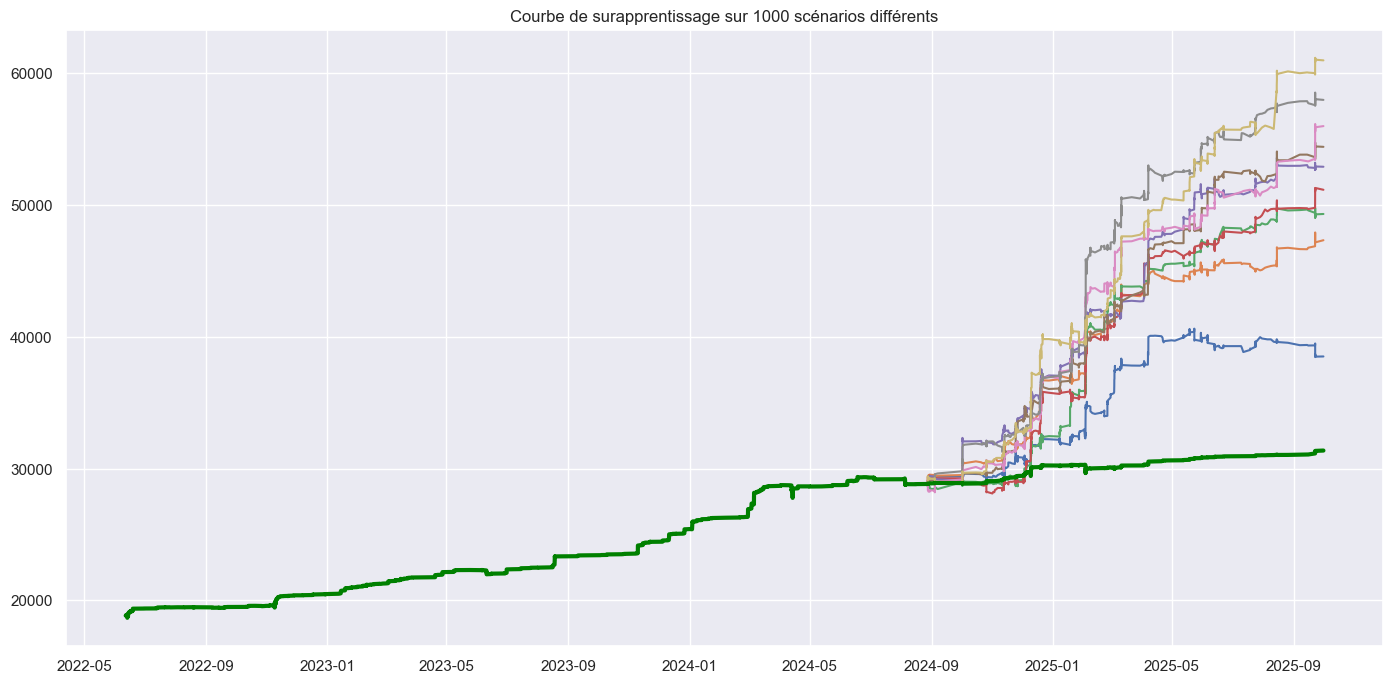

In [8]:
from importlib import reload
import utilities.plot_analysis
reload(utilities.plot_analysis)
from utilities.plot_analysis import plot_futur_simulations, plot_train_test_simulation, detect_date_train_test

# Simulation de divers scénarios futurs
plot_futur_simulations(
    df_trades=df_trades,
    trades_multiplier=3,
    trades_to_forecast=500,
    number_of_simulations=500,
    true_trades_to_show=100,
    show_all_simulations=True,
)

# Comparaison entre les divers scénarios et la réalité pour voir si il y a du surapprentissage
# Séparation des échantillons en train et en test - Méthode de Monte Carlo (Loi normale)
plot_train_test_simulation(
    df_trades=df_trades,
    train_test_date=detect_date_train_test("2020-04-01", 0.2),
    trades_multiplier=3,
    number_of_simulations=1000
)

In [ ]:
from lightweight_charts import JupyterChart

pair = "MAGIC/USDT:USDT"
dt = df_list[pair].copy().loc["2023":"2024"]
dt_trades = df_trades.copy().loc["2024"]
dt_trades = dt_trades.loc[dt_trades["pair"] == pair]
chart = JupyterChart(width=1300, height=700)

dt["time"] = dt.index
chart.set(dt)

lines = ["ma_low_1", "ma_high_1", "ma_base", "ma_low_2", "ma_low_3", "ma_high_2", "ma_high_3"]
for line in lines:
    line_object = chart.create_line(line, width=1)
    line_data = pd.DataFrame({"time": dt.index, line: dt[line]})
    line_object.set(line_data)

def place_buy_order(key):
    print(f'Buy {key} shares.')

for trades in dt_trades.iterrows():
    if trades[1]['position'] == "LONG":
        chart.marker(time=trades[1]['open_date'], position="below", shape="arrow_up", color="green", text="Long")
        chart.marker(time=trades[1]['close_date'], position="above", shape="arrow_down", color="white", text="Close")
    elif trades[1]['position'] == "SHORT":
        chart.marker(time=trades[1]['open_date'], position="above", shape="arrow_down", color="red", text="Short")
        chart.marker(time=trades[1]['close_date'], position="below", shape="arrow_up", color="white", text="Close")

# chart.show(block=True)
chart.load()

<h2>Matrice de correlation</h2>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

close_prices = pd.DataFrame()

for crypto, df in df_list.items():
    # Extraction du nom de la cryptomonnaie
    crypto_name = crypto.split('/')[0]
    close_prices[crypto_name] = df['close']

# Calcul de la matrice de corrélation
correlation_matrix = close_prices.corr()

average_correlation = correlation_matrix.mean().mean()
print(f"Corrélation moyenne entre toutes les cryptos : {average_correlation}")
sorted_correlation = correlation_matrix.mean().sort_values()
seuil_faible, seuil_forte = 0.5, 0.75
cryptos_faibles_correlations = sorted_correlation[sorted_correlation < seuil_faible]
cryptos_fortes_correlations = sorted_correlation[sorted_correlation > seuil_forte]

print(f"Cryptomonnaies avec des corrélations moyennes inférieures à {seuil_faible}:")
print(correlation_matrix[cryptos_faibles_correlations.index].mean())
print(f"Cryptomonnaies avec des corrélations moyennes suppérieur à {seuil_forte}:")
print(correlation_matrix[cryptos_fortes_correlations.index].mean())


# Affichez la matrice de corrélation avec seaborn
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

<h2>Optimisation des paramètres</h2>

<h3>Optuna V1</h3>

In [ ]:
import optuna
from functools import partial

best_params_per_pair = params.copy()
print(best_params_per_pair)

# Structure de données pour stocker les meilleurs paramètres par paire
best_params_results = {pair: {"sharpe_ratio": -float('inf'), "params": None} for pair in best_params_per_pair}

def optimize(trial):
    global best_params_results

   # Extract hyperparameters from trial object
    src = 'close'
    ma_base_window = trial.suggest_int("ma_base_window", 2, 10)
    envelopes = [
        trial.suggest_float(f"e{i+1}", low, high, step=0.01)
        for i, (low, high) in enumerate([(0.02, 0.1), (0.05, 0.13), (0.07, 0.15), (0.08, 0.21)])
    ]
    size = round(trial.suggest_float("size", 0.01, 0.5, log=True), 2)
    
    # Créer un nouvel ensemble de paramètres avec les hyperparamètres sélectionnés aléatoirement
    new_params = {}
    for pair, old_params in best_params_per_pair.items():
        new_params[pair] = {
            "src": src,
            "ma_base_window": ma_base_window,
            "envelopes": envelopes,
            "size": size
        }

    print(new_params)

    strat = EnvelopeMulti(
        df_list=df_list,
        oldest_pair=oldest_pair,
        type=type,
        params=new_params,
    )

    strat.populate_indicators()
    strat.populate_buy_sell()
    bt_result = strat.run_backtest(initial_wallet=1000, leverage=1, maker_fee=maker_fee, 
                                taker_fee=taker_fee, stop_loss=stop_loss, reinvest=reinvest)
    
    return bt_result["sharpe_ratio"]
    

study = optuna.create_study(direction="maximize", storage="sqlite:///envelope_multi.db", study_name="test", load_if_exists=True)
study.optimize(partial(optimize), n_trials=4)

# Affichage des meilleurs résultats par paire
print("Meilleurs paramètres :", study.best_params)
for pair, result in best_params_results.items():
    print(f"{pair}: Sharpe Ratio = {result['sharpe_ratio']}, Paramètres = {result['params']}")

<h3>Optuna V2<h3>

In [ ]:
import optuna
from functools import partial
import copy
import gc

# Ajoutez les paires aux hyperparamètres
pairs = list(params.keys())

def optimize(trial):
    try:
        # Utilisez un dictionnaire pour stocker les hyperparamètres spécifiques à chaque paire
        params_per_pair = {}
        for pair in pairs:
            # size = round(trial.suggest_float(f"{pair}_size", 0.01, 0.5, log=True), 2)
            ma_base_window = trial.suggest_int(f"{pair}_ma_base_window", 2, 11)
            envelopes = [
                trial.suggest_float(f"{pair}_e{i+1}", low, high, step=0.01)
                for i, (low, high) in enumerate([(0.02, 0.1), (0.05, 0.15), (0.07, 0.2), (0.08, 0.25)])
            ]
            
            params_per_pair[pair] = {
                "src": 'close',
                "ma_base_window": ma_base_window,
                "envelopes": envelopes,
                "size": params[pair]["size"]
            }

        df_list_copy = copy.deepcopy(df_list)

        strat = EnvelopeMulti(
            df_list=df_list_copy,
            oldest_pair=oldest_pair,
            type=type,
            params=params_per_pair,
        )

        strat.populate_indicators()
        strat.populate_buy_sell()
        bt_result = strat.run_backtest(initial_wallet=1000, leverage=1, maker_fee=maker_fee, 
                                    taker_fee=taker_fee, stop_loss=stop_loss, reinvest=reinvest)

        # Combinaison pondérée du Sharpe ratio et du portefeuille
        objective_value = 0.4 * bt_result["sharpe_ratio"] + 0.6 * bt_result["wallet"]
        
        return objective_value
    except Exception as e:
        print(f"Une erreur non gérée s'est produite durant l'essai #{trial.number}: {str(e)}")
        raise optuna.exceptions.TrialPruned()

study = optuna.create_study(direction="maximize", 
                            storage="sqlite:///envelope_multi.db", 
                            study_name="multi_new", 
                            load_if_exists=True,
                            sampler=optuna.samplers.TPESampler(),
                            pruner=optuna.pruners.HyperbandPruner())
study.optimize(partial(optimize), n_trials=1, n_jobs=8)

gc.collect()

print("Meilleurs paramètres:", study.best_params)
print("Meilleur score: ", study.best_value)

<h3>Backtest meilleurs paramètres</h3>

In [ ]:
# Backtest meilleurs paramètres
import optuna
from functools import partial

# Ajoutez les paires aux hyperparamètres
pairs = list(params.keys())

# Chargez l'étude à partir de la base de données existante
study_name = "multi_new"
study = optuna.load_study(study_name=study_name, storage="sqlite:///envelope_multi.db")
best_params = study.best_params

# Utilisez un dictionnaire pour stocker les meilleurs paramètres spécifiques à chaque paire
best_params_per_pair = {}
for pair in pairs:
    best_params_per_pair[pair] = {
        "src": 'close',
        "ma_base_window": best_params[f"{pair}_ma_base_window"],
        "envelopes": [
            best_params[f"{pair}_e{i+1}"]
            for i in range(4)
        ],
        "size": params[pair]["size"]
        # "size": round(best_params[f"{pair}_size"], 2)
    }

# Créez une instance de la stratégie avec les meilleurs paramètres
best_strat = EnvelopeMulti(
    df_list=df_list,
    oldest_pair=oldest_pair,
    type=type,
    params=best_params_per_pair,
)

best_strat.populate_indicators()
best_strat.populate_buy_sell()

# Exécutez le backtest final avec les meilleurs paramètres
final_bt_result = best_strat.run_backtest(initial_wallet=1000, leverage=1, maker_fee=maker_fee,
                                          taker_fee=taker_fee, stop_loss=stop_loss, reinvest=reinvest)

# Affichez les résultats du backtest final
print("Meilleurs paramètres :", best_params)
print("Portefeuille final :", final_bt_result["wallet"])
print("Ratio de Sharpe final :", final_bt_result["sharpe_ratio"])

Portefeuille final : 2704.9662941578677
Ratio de Sharpe final : 2.806633072136248<br>
Portefeuille final : 2851.1726621644975
Ratio de Sharpe final : 2.92904420389889<br>
Portefeuille final : 3163.849911798647
Ratio de Sharpe final : 3.206915077755632<br>
Portefeuille final : 3087.989427702415
Ratio de Sharpe final : 3.317533482580416

<h3>Graphiques</h3>

In [ ]:
import optuna.visualization as ov
import matplotlib.pyplot as plt

# Sélectionnez la paire que vous souhaitez visualiser
selected_pair = "AVAX/USDT:USDT"

# Créez un graphique de contour pour les paramètres spécifiques de la paire sélectionnée
target_param_names = [f"{selected_pair}_ma_base_window", f"{selected_pair}_e1", f"{selected_pair}_e2", f"{selected_pair}_e3", f"{selected_pair}_e4"]

ov.plot_optimization_history(study)

In [ ]:
ov.plot_contour(study, params=target_param_names)


In [ ]:

ov.plot_slice(study, target_param_names)

In [ ]:
plot_rank(study, target_param_names)

In [ ]:
ov.plot_param_importances(study)

In [ ]:
plot_edf(study)